In [ ]:
train_image = "c:\\b\\train_4000"
train_label = "c:\\b\\train_label_4000.csv"


def image_load(path):
    file_list = os.listdir(path)
    for i in range(len(file_list)):
        file_list[i] = int(file_list[i][0:-4])
    file_list.sort()
    for i in range(len(file_list)):
        file_list[i] = path + "\\" + str(file_list[i]) + ".jpg"
    image =[]
    for i in file_list:
        img = cv2.imread(i)
        image.append(img)
    image = np.array(image)
    return image
    return file_list

def label_load(path):
    file = open(path)
    labeldata = csv.reader(file)
    labellist = []
    for i in labeldata:
        labellist.append(i)
    labellist = np.array(labellist).astype(int)
    labellist = np.eye(2)[labellist]
    return np.squeeze(labellist, axis = 1)


In [1]:
#문제 69 위의 4개의 함수를 loader3.py로 생성해서 아래와 같이 실행되게 해보시오 !

import loader3

train_image = "c:\\b\\train_4000"
train_label = "c:\\b\\train_label_4000.csv"

print("LOADING DATA")
trainX = loader3.image_load(train_image)
print(trainX.shape)
trainY = loader3.label_load(train_label)
print(trainY.shape)

LOADING DATA
(4000, 128, 128, 3)
(4000, 2)


In [3]:
#문제 71. 지난번에 cifar10 이미지 신경망 생성할 때 사용했던 next_batch 함수를 가지고 와서 개 / 고양이 사진이 100개씩 배치되도록 next_batch 함수를 만들고 실행하시오 !

import loader3

test_image = "c:\\b\\test_100"
test_label = "c:\\b\\test_label_100.csv"

testX = loader3.image_load(test_image)
testY = loader3.label_load(test_label)

def next_batch(img, label, start, finish):
    return img[start:finish], label[start:finish]

print(next_batch(testX, testY, 0, 100))


(array([[[[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[252, 255, 253],
         [252, 255, 253],
         [252, 255, 253],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],

        [[255, 255, 254],
         [255, 255, 254],
         [255, 255, 254],
         ...,
         [254, 255, 253],
         [254, 255, 253],
         [254, 255, 253]],

        [[253, 254, 252],
         [253, 254, 252],
         [253, 254, 252],
         ...,
         [254, 255, 253],
       

In [6]:
#--- 훈련 데이터 next_batch

import loader3

train_image = "c:\\b\\train_3900"
train_label = "c:\\b\\train_label_3900.csv"

trainX = loader3.image_load(train_image)
trainY = loader3.label_load(train_label)


def next_batch(img, label, start, finish):
    return img[start:finish], label[start:finish]

trainx, trainy = next_batch(trainX, trainY, 0, 100)

print(trainX.shape)
print(trainY.shape)
print(trainx.shape)
print(trainy.shape)

(3900, 128, 128, 3)
(3900, 2)
(100, 128, 128, 3)
(100, 2)


In [10]:
#문제 72. cifar10때 사용했던 shuffle_batch 함수를 가져와서 개/고양이의 훈련 데이터가 잘 섞이는지 확인하시오 !

import loader3
import numpy as np

train_image = "c:\\b\\train_3900"
train_label = "c:\\b\\train_label_3900.csv"

trainX = loader3.image_load(train_image)
trainY = loader3.label_load(train_label)


def shuffle_batch(dataa, datab):
    x = np.arange(len(dataa))
    np.random.shuffle(x)
    data_list2 = dataa[x]
    label2 = datab[x]
    return data_list2, label2

trainx_shuffle, trainy_shuffle = shuffle_batch(trainX, trainY)

print(trainy_shuffle)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [2]:
#문제 73. 개/고양이 사진이 128 x 128 인데 32 x 32 로 resize 해서 별도의 폴더에 저장하시오 !

import os
import cv2

path = "C:\\Users\\heaven\\python_project\\Recycle_woody\\first_im"
    
file_list = os.listdir(path)
for j,i in enumerate(file_list):
    img = cv2.imread(path+'\\'+i)
    width, height = img.shape[:2]
    resize = cv2.resize(img, (512, 512), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite("C:\\Users\\heaven\\python_project\\Recycle_woody\\Battery\\" + str(j+1) + '.jpg',resize)

In [3]:
#---사진 방향 바꿔서 저장

import os
import cv2

path = "C:\\Users\\heaven\\python_project\\catdog\\train_3900"

file_list = os.listdir(path)
file_name = sorted([int(i[:-4]) for i in file_list])
file_list = [path+'\\'+str(i)+'.jpg' for i in file_name]

for j,i in enumerate(file_list):
    img = cv2.imread(i)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    width, height = img.shape[:2]
    resize = cv2.resize(img, (int(width / 2), int(height / 2)), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite("C:\\Users\\heaven\\python_project\\catdog\\resize\\train_3900\\" + str(j+3889) + '.jpg',resize)

In [2]:
# -- test도 resize 해주자

import os
import cv2

path = "C:\\Users\\heaven\\python_project\\catdog\\test_100"
    
file_list = os.listdir(path)
file_name = sorted([int(i[:-4]) for i in file_list])
file_list = [path+'\\'+str(i)+'.jpg' for i in file_name]
for j,i in enumerate(file_list):
    img = cv2.imread(i)
    width, height = img.shape[:2]
    resize = cv2.resize(img, (int(width / 2), int(height / 2)), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite("C:\\Users\\heaven\\python_project\\catdog\\resize\\test_100\\" + str(j+1) + '.jpg',resize)

In [73]:
# -- 임시

import loader3

train_image = "C:\\Users\\heaven\\python_project\\catdog\\resize_i\\train1"

trainX = loader3.image_load(train_image)


print(trainX.shape)


(7512, 64, 64, 3)


In [69]:
print(trainX[1])

[[[255 255 255]
  [250 255 255]
  [246 255 255]
  ...
  [255 254 255]
  [253 253 255]
  [251 254 255]]

 [[255 255 254]
  [255 255 254]
  [253 255 254]
  ...
  [253 255 255]
  [251 254 255]
  [251 254 255]]

 [[255 255 252]
  [255 255 252]
  [255 255 254]
  ...
  [255 255 254]
  [255 254 255]
  [253 254 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [255 255 255]
  [255 254 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [255 255 252]
  [253 255 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 252]
  [253 255 251]
  [253 255 252]]]


In [10]:
#문제 74. (점심시간 문제) 32x32로 줄인 개고양이 사진을 지난번 cifar10할때 만들었던 vgg 코드에 입력해서 훈련시키고 나서 테스트 데이터를 입력해서 정확도를 확인하시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import loader3

#데이터 로드 그리고 한번에 셔플
train_image = '/home/heaven/work_space/d/resize/train_3900'
train_label = '/home/heaven/work_space/d/resize/train_label_3900.csv'
test_image = '/home/heaven/work_space/d/resize/test_100'
test_label = '/home/heaven/work_space/d/resize/test_label_100.csv'



print("LOADING DATA")

trainX = loader3.image_load(train_image)
trainY = loader3.label_load(train_label)
testX = loader3.image_load(test_image)
testY = loader3.label_load(test_label)

print("LOADED DATA")

tf.reset_default_graph()

#입력층
x = tf.placeholder("float",[None,32,32,3])
keep_prob = tf.placeholder("float")


#conv_1
b1 = tf.Variable(tf.ones([128]))
W1 = tf.Variable(tf.random_normal([3,3,3,128],stddev = 0.01))
y1 = tf.nn.conv2d(x, W1, strides=[1,1,1,1], padding = 'SAME')
y1 = y1 + b1
y1 = tf.contrib.layers.batch_norm(y1,scale=True)
y1 = tf.nn.leaky_relu(y1)

#conv_2
b1_2 = tf.Variable(tf.ones([128]))
W1_2 =  tf.Variable(tf.random_normal([3,3,128,128],stddev = 0.01))
y1_2 = tf.nn.conv2d(y1, W1_2, strides=[1,1,1,1], padding = 'SAME')
y1_2 = y1_2 + b1_2
y1_2 = tf.contrib.layers.batch_norm(y1_2,scale=True)
y1_2 = tf.nn.leaky_relu(y1_2)
y1_2 = tf.nn.dropout(y1_2, keep_prob)

#maxpooling
y1_2 = tf.nn.max_pool(y1_2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')


#conv_3
b2 = tf.Variable(tf.ones([256]))
W2 = tf.Variable(tf.random_normal([3,3,128,256],stddev = 0.01))
y2 = tf.nn.conv2d(y1_2, W2, strides=[1,1,1,1], padding = 'SAME')
y2 = y2 + b2
y2 = tf.contrib.layers.batch_norm(y2,scale=True)
y2 = tf.nn.leaky_relu(y2)

#conv_4
b2_2 = tf.Variable(tf.ones([256]))
W2_2 = tf.Variable(tf.random_normal([3,3,256,256],stddev = 0.01))
y2_2 = tf.nn.conv2d(y2, W2_2, strides=[1,1,1,1], padding = 'SAME')
y2_2 = y2_2 + b2_2
y2_2 = tf.contrib.layers.batch_norm(y2_2,scale=True)
y2_2 = tf.nn.leaky_relu(y2_2)
y2_2 = tf.nn.dropout(y2_2, keep_prob)

#maxpooling
y2_2 = tf.nn.max_pool(y2_2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')


#conv_5
b3 = tf.Variable(tf.ones([512]))
W3 = tf.Variable(tf.random_normal([3,3,256,512],stddev = 0.01))
y3 = tf.nn.conv2d(y2_2, W3, strides=[1,1,1,1], padding = 'SAME')
y3 = y3 + b3
y3 = tf.contrib.layers.batch_norm(y3,scale=True)
y3 = tf.nn.leaky_relu(y3)

#conv_6
b3_2 = tf.Variable(tf.ones([512]))
W3_2 = tf.Variable(tf.random_normal([3,3,512,512],stddev = 0.01))
y3_2 = tf.nn.conv2d(y3, W3_2, strides=[1,1,1,1], padding = 'SAME')
y3_2 = y3_2 + b3_2
y3_2 = tf.contrib.layers.batch_norm(y3_2,scale=True)
y3_2 = tf.nn.leaky_relu(y3_2)
y3_2 = tf.nn.dropout(y3_2, keep_prob)

#maxpooling
y3_2 = tf.nn.max_pool(y3_2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')


#Affine1
b4 = tf.Variable(tf.ones([1024]))
W4 = tf.get_variable(name='W4', shape=[4*4*512, 1024], initializer=tf.contrib.layers.variance_scaling_initializer())
y4 = tf.reshape(y3_2, [-1, 4*4*512])
y4 = tf.matmul(y4,W4) + b4
y4 = tf.contrib.layers.batch_norm(y4,scale=True)
y4 = tf.nn.leaky_relu(y4)


#Affine2
b5 = tf.Variable(tf.ones([1024]))
W5 = tf.get_variable(name='W5', shape=[1024, 1024], initializer=tf.contrib.layers.variance_scaling_initializer())
y5 = tf.matmul(y4,W5) + b5
y5 = tf.contrib.layers.batch_norm(y5,scale=True)
y5 = tf.nn.leaky_relu(y5)


#드롭아웃
y5_drop = tf.nn.dropout(y5, keep_prob)


#출력층
b6 = tf.Variable(tf.ones([2]))
W6 = tf.get_variable(name='W6', shape=[1024, 2], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
y6 = tf.matmul(y5_drop,W6) + b6
y6 = tf.contrib.layers.batch_norm(y6,scale=True)
y_hat = tf.nn.softmax(y6)


#예측값
y_predict = tf.argmax(y_hat,1)


# 라벨을 저장하기 위한 변수 생성
y_onehot = tf.placeholder("float",[None,2])
y_label = tf.argmax(y_onehot, axis = 1)


# 정확도를 출력하기 위한 변수 생성
correct_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))


# 교차 엔트로피 오차 함수
loss = -tf.reduce_sum(y_onehot * tf.log(y_hat), axis = 1)


# SGD 경사 감소법
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)


# Adam 경사 감소법
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)


# 학습 오퍼레이션 정의
train = optimizer.minimize(loss)


# 변수 초기화
init = tf.global_variables_initializer()
train_acc_list = []
test_acc_list = []


with tf.Session() as sess:
    sess.run(init)
    for j in range(20):
        for i in range(600):
            trainX , trainY = loader3.shuffle_batch(trainX, trainY)
            testX, testY = loader3.shuffle_batch(testX, testY)

            train_xs, train_ys = loader3.next_batch(trainX, trainY, 0, 100)
            test_xs, test_ys = loader3.next_batch(testX, testY, 0, 100)

            sess.run(train, feed_dict={x: train_xs, y_onehot: train_ys, keep_prob: 0.8})

            if i == 0:
                train_acc = sess.run(accuracy, feed_dict={x: train_xs, y_onehot: train_ys, keep_prob: 1.0})
                test_acc = sess.run(accuracy, feed_dict={x: test_xs, y_onehot: test_ys, keep_prob: 1.0})

                train_acc_list.append(train_acc)
                test_acc_list.append(test_acc)

                print('훈련', str(j + 1) + '에폭 정확도 :', train_acc)
                print('테스트', str(j + 1) + '에폭 정확도 :', test_acc)
                print('-----------------------------------------------')

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot()
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(min(min(train_acc_list),min(test_acc_list))-0.1, 1.1)
plt.legend(loc='lower right')
plt.show()

LOADING DATA


FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '/home/heaven/work_space/d/resize/train_3900'

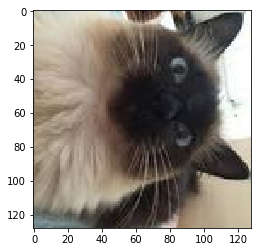

In [5]:
# 예제 1.png 고양이 사진을 open_CV.ipynb.txt를 이용해서 회전시오 !

import cv2 as cv
import matplotlib.pyplot as plt

img = plt.imread("C:\\1.jpg") 
img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
#img = cv.rotate(img, 2)
plt.imshow(img)

In [4]:
#문제 75. 이미지를 회전시키는 아래의 코드를 이용해서 개사진 1950장을 회전시킨 1950장을 생성하시오 !

import os
import cv2

path = "c:\\b\\train_3900"
    
file_list = os.listdir(path)
file_name = sorted([int(i[:-4]) for i in file_list])
file_list = [path+'\\'+str(i)+'.jpg' for i in file_name]

for j,i in enumerate(file_list):
    img = cv2.imread(i)
    img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
    width, height = img.shape[:2]
    resize = cv2.resize(img, (int(width / 4), int(height / 4)), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite("c:\\b\\train_3900_rotate\\" + str(j+1) + '.jpg',resize)

In [6]:
# -- test데이터도 해보자

import os
import cv2

path = "c:\\b\\test_100"
    
file_list = os.listdir(path)
file_name = sorted([int(i[:-4]) for i in file_list])
file_list = [path+'\\'+str(i)+'.jpg' for i in file_name]

for j,i in enumerate(file_list):
    img = cv2.imread(i)
    img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
    width, height = img.shape[:2]
    resize = cv2.resize(img, (int(width / 4), int(height / 4)), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite("c:\\b\\test_100_rotate\\" + str(j+1) + '.jpg',resize)

In [7]:
# -- 실데이터 전처리

import os
import cv2

path = "c:\\b\\train_3900"
    
file_list = os.listdir(path)
file_name = sorted([int(i[:-4]) for i in file_list])
file_list = [path+'\\'+str(i)+'.jpg' for i in file_name]

for j,i in enumerate(file_list):
    img = cv2.imread(i)
    img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
    width, height = img.shape[:2]
    resize = cv2.resize(img, (int(width / 4), int(height / 4)), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite("c:\\b\\resize\\train_3900\\" + str(j+3901) + '.jpg',resize)
    
    
## 데이터 라벨도 복붙으로 전처리

LOADING DATA
LOADED DATA
훈련 1에폭 정확도 : 0.77
테스트 1에폭 정확도 : 0.57
-----------------------------------------------
훈련 2에폭 정확도 : 0.85
테스트 2에폭 정확도 : 0.84
-----------------------------------------------
훈련 3에폭 정확도 : 1.0
테스트 3에폭 정확도 : 0.89
-----------------------------------------------
훈련 4에폭 정확도 : 0.98
테스트 4에폭 정확도 : 0.86
-----------------------------------------------
훈련 5에폭 정확도 : 1.0
테스트 5에폭 정확도 : 0.83
-----------------------------------------------
훈련 6에폭 정확도 : 1.0
테스트 6에폭 정확도 : 0.85
-----------------------------------------------
훈련 7에폭 정확도 : 1.0
테스트 7에폭 정확도 : 0.79
-----------------------------------------------
훈련 8에폭 정확도 : 1.0
테스트 8에폭 정확도 : 0.89
-----------------------------------------------
훈련 9에폭 정확도 : 1.0
테스트 9에폭 정확도 : 0.88
-----------------------------------------------
훈련 10에폭 정확도 : 1.0
테스트 10에폭 정확도 : 0.87
-----------------------------------------------
훈련 11에폭 정확도 : 1.0
테스트 11에폭 정확도 : 0.89
-----------------------------------------------
훈련 12에폭 정확도 : 1.0
테스트 12에폭 정확도 : 0.89
------

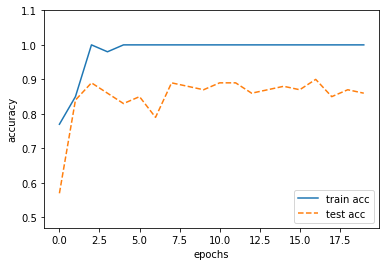

In [3]:
#문제 76. 원본과 회전 시킨 사진을 합쳐서 8000장으로 다시 vgg 모델에 넣고 학습시켜서 테스트 데이터의 정확도가 올라가는지 확인하시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import loader3

#데이터 로드
train_image = 'C:\\Users\\heaven\\python_project\\catdog\\resize\\train_3900'
train_label = 'C:\\Users\\heaven\\python_project\\catdog\\train_label_3900.csv'
test_image = 'C:\\Users\\heaven\\python_project\\catdog\\resize\\test_100'
test_label = 'C:\\Users\\heaven\\python_project\\catdog\\test_label_100.csv'



print("LOADING DATA")

trainX = loader3.image_load(train_image)
trainY = loader3.label_load(train_label)
testX = loader3.image_load(test_image)
testY = loader3.label_load(test_label)

print("LOADED DATA")

tf.reset_default_graph()

#입력층
x = tf.placeholder("float",[None,32,32,3])
keep_prob = tf.placeholder("float")


#conv_1
b1 = tf.Variable(tf.ones([128]))
W1 = tf.Variable(tf.random_normal([3,3,3,128],stddev = 0.01))
y1 = tf.nn.conv2d(x, W1, strides=[1,1,1,1], padding = 'SAME')
y1 = y1 + b1
y1 = tf.contrib.layers.batch_norm(y1,scale=True)
y1 = tf.nn.leaky_relu(y1)

#conv_2
b1_2 = tf.Variable(tf.ones([128]))
W1_2 =  tf.Variable(tf.random_normal([3,3,128,128],stddev = 0.01))
y1_2 = tf.nn.conv2d(y1, W1_2, strides=[1,1,1,1], padding = 'SAME')
y1_2 = y1_2 + b1_2
y1_2 = tf.contrib.layers.batch_norm(y1_2,scale=True)
y1_2 = tf.nn.leaky_relu(y1_2)
y1_2 = tf.nn.dropout(y1_2, keep_prob)

#maxpooling
y1_2 = tf.nn.max_pool(y1_2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')


#conv_3
b2 = tf.Variable(tf.ones([256]))
W2 = tf.Variable(tf.random_normal([3,3,128,256],stddev = 0.01))
y2 = tf.nn.conv2d(y1_2, W2, strides=[1,1,1,1], padding = 'SAME')
y2 = y2 + b2
y2 = tf.contrib.layers.batch_norm(y2,scale=True)
y2 = tf.nn.leaky_relu(y2)

#conv_4
b2_2 = tf.Variable(tf.ones([256]))
W2_2 = tf.Variable(tf.random_normal([3,3,256,256],stddev = 0.01))
y2_2 = tf.nn.conv2d(y2, W2_2, strides=[1,1,1,1], padding = 'SAME')
y2_2 = y2_2 + b2_2
y2_2 = tf.contrib.layers.batch_norm(y2_2,scale=True)
y2_2 = tf.nn.leaky_relu(y2_2)
y2_2 = tf.nn.dropout(y2_2, keep_prob)

#maxpooling
y2_2 = tf.nn.max_pool(y2_2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')


#conv_5
b3 = tf.Variable(tf.ones([512]))
W3 = tf.Variable(tf.random_normal([3,3,256,512],stddev = 0.01))
y3 = tf.nn.conv2d(y2_2, W3, strides=[1,1,1,1], padding = 'SAME')
y3 = y3 + b3
y3 = tf.contrib.layers.batch_norm(y3,scale=True)
y3 = tf.nn.leaky_relu(y3)

#conv_6
b3_2 = tf.Variable(tf.ones([512]))
W3_2 = tf.Variable(tf.random_normal([3,3,512,512],stddev = 0.01))
y3_2 = tf.nn.conv2d(y3, W3_2, strides=[1,1,1,1], padding = 'SAME')
y3_2 = y3_2 + b3_2
y3_2 = tf.contrib.layers.batch_norm(y3_2,scale=True)
y3_2 = tf.nn.leaky_relu(y3_2)
y3_2 = tf.nn.dropout(y3_2, keep_prob)

#maxpooling
y3_2 = tf.nn.max_pool(y3_2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')


#Affine1
b4 = tf.Variable(tf.ones([1024]))
W4 = tf.get_variable(name='W4', shape=[4*4*512, 1024], initializer=tf.contrib.layers.variance_scaling_initializer())
y4 = tf.reshape(y3_2, [-1, 4*4*512])
y4 = tf.matmul(y4,W4) + b4
y4 = tf.contrib.layers.batch_norm(y4,scale=True)
y4 = tf.nn.leaky_relu(y4)


#Affine2
b5 = tf.Variable(tf.ones([1024]))
W5 = tf.get_variable(name='W5', shape=[1024, 1024], initializer=tf.contrib.layers.variance_scaling_initializer())
y5 = tf.matmul(y4,W5) + b5
y5 = tf.contrib.layers.batch_norm(y5,scale=True)
y5 = tf.nn.leaky_relu(y5)


#드롭아웃
y5_drop = tf.nn.dropout(y5, keep_prob)


#출력층
b6 = tf.Variable(tf.ones([2]))
W6 = tf.get_variable(name='W6', shape=[1024, 2], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
y6 = tf.matmul(y5_drop,W6) + b6
y6 = tf.contrib.layers.batch_norm(y6,scale=True)
y_hat = tf.nn.softmax(y6)


#예측값
y_predict = tf.argmax(y_hat,1)


# 라벨을 저장하기 위한 변수 생성
y_onehot = tf.placeholder("float",[None,2])
y_label = tf.argmax(y_onehot, axis = 1)


# 정확도를 출력하기 위한 변수 생성
correct_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))


# 교차 엔트로피 오차 함수
loss = -tf.reduce_sum(y_onehot * tf.log(y_hat), axis = 1)


# SGD 경사 감소법
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)


# Adam 경사 감소법
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)


# 학습 오퍼레이션 정의
train = optimizer.minimize(loss)


# 변수 초기화
init = tf.global_variables_initializer()
train_acc_list = []
test_acc_list = []


with tf.Session() as sess:
    sess.run(init)
    for j in range(20):
        for i in range(600):
            trainX , trainY = loader3.shuffle_batch(trainX, trainY)
            testX, testY = loader3.shuffle_batch(testX, testY)

            train_xs, train_ys = loader3.next_batch(trainX, trainY, 0, 100)
            test_xs, test_ys = loader3.next_batch(testX, testY, 0, 100)

            sess.run(train, feed_dict={x: train_xs, y_onehot: train_ys, keep_prob: 0.8})

            if i == 0:
                train_acc = sess.run(accuracy, feed_dict={x: train_xs, y_onehot: train_ys, keep_prob: 1.0})
                test_acc = sess.run(accuracy, feed_dict={x: test_xs, y_onehot: test_ys, keep_prob: 1.0})

                train_acc_list.append(train_acc)
                test_acc_list.append(test_acc)

                print('훈련', str(j + 1) + '에폭 정확도 :', train_acc)
                print('테스트', str(j + 1) + '에폭 정확도 :', test_acc)
                print('-----------------------------------------------')

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot()
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(min(min(train_acc_list),min(test_acc_list))-0.1, 1.1)
plt.legend(loc='lower right')
plt.show()

In [ ]:
#문제 77. (오늘의 마지막 문제) 카톡에 첨부한 고양이 14977장, 개사진 17830장 이미지를 다운받아 훈련 데이터와 테스트 데이터로 나누고 vgg9신경망에 넣어서 학습시키시오 !

